# Operating Expenses

The Single Territorial Form (FUT) reduce the number of basic official data reports to be submitted to the National Government, the Departments, Districts and Municipalities, their public establishments, the Territories and certified Indigenous Reservations and/or Associations of the latter, referred to in Decree 1953 of 2014 or the rule that amends, adds or replaces it. Likewise, the FUT shall promote the simplification and improvement of the quality of such reports to be informed. In this regard, no entity of the National Government may, on its own account, request from the entities obliged to report to the FUT the information that they are already reporting through it.

One of the most important FUT categories is operating expenses.

**Entity:** Contaduría General de la Nación

**Description:** Historical information (2012-2021) of the operating expenses of the country's
municipalities.

**Variables**

1. FUT code - int -
2. Entity name - string - name of the territorial entity
3. DANE department code - int - code that assigns the DANE to each department
4. Name DANE department - string - department name
5. DANE code municipality - int - code that assigns the DANE to each municipality
6. Name DANE municipality - string - name of the municipality
7. Concept Code - string - code that is assigned to each concept
8. Concept - string - name of each income received by the territorial entity
9. Executing Unit Code - int -
10. Executing Unit - string -
11. Initial Budget - float - initial budget projected by the territorial entity for each concept
12. Final Budget - float - budget at the end of the year
13. Commitments - float - total revenue collected
14. Obligations - float - total value of the commitments contracted into by the territorial entity
15. Payments - float - total value intended to pay the obligations

For more information click [here](https://www.chip.gov.co/schip_rt/paginiciofut.htm).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Overview

The data is separated into different csv's by year from 2012 to 2021, so it is necessary to merge them in order to process and clean them all together at the same time.

In [2]:
%%capture 
## Add the capture line to eliminate warning messages
## A list containing the years 2012 to 2021 is created.
years = list(range(2013, 2022))

## Start by loading the dataset of operating cats for the year 2012.
df = pd.read_csv('FUT_GASTOS_FUNCIONAMIENTO_2012.csv', sep = ";",error_bad_lines=False, encoding = 'utf-8')

## A special column is created to contain the year to which each DataSet belongs.
df['Año'] = 2012

## To concatenate the data, an auxiliary dataframe will be created and updated with the data for each year.
## to be appended to the initial DataFrame.
for year in years:
    aux_df =  pd.read_csv('FUT_GASTOS_FUNCIONAMIENTO_'+ str(year) +'.csv', sep = ";",error_bad_lines=False, encoding = 'utf-8')
    aux_df['Año'] = year
    df = pd.concat([df, aux_df], axis = 0)

## Reset the index to remove the levels generated by the concatenation.
df.reset_index(drop=True, inplace=True)

We found that the complete DataSet of running cats contains almost 2 million individuals and 18 variables.

In [3]:
df.shape

(1927006, 18)

Whose first 5 individuals look as follows.

In [4]:
df.head()

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,Código Fuente Financiación,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año
0,115050000,DEPARTAMENTO DEL META,50,META,NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,12.808.880,12.889.311,12.668.113,12.668.113,12.654.124,2012
1,117373000,DEPARTAMENTO DEL TOLIMA,73,TOLIMA,NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,8.632.800,8.098.443,7.954.339,7.929.967,7.924.443,2012
2,118181000,DEPARTAMENTO DEL ARAUCA,81,ARAUCA,NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,5.607.508,5.065.710,5.034.157,5.034.157,5.010.440,2012
3,118888000,"DEPARTAMENTO DEL ARCHIPIÉLAGO DE SAN ANDRÉS, P...",88,"ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANT...",NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,11.326.872,10.692.072,9.929.404,9.929.404,9.929.404,2012
4,110505000,DEPARTAMENTO DE ANTIOQUIA,5,ANTIOQUIA,NaN,NaN,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,1.0,ADMINISTRACIÓN CENTRAL,NaN,NaN,61.771.292,62.918.327,56.040.454,56.040.454,56.015.936,2012


As can be seen below, the size of the data reported each year has been increasing since 2012, so it is to be expected that the total cats for the last few years will be comparatively much larger than the first year if inflation is not taken into account. On the other hand, 2021 is the year with the lowest number of rows since these have not yet been reported.

In [5]:
df['Año'].value_counts()

2020    215793
2018    214533
2017    214368
2019    213704
2016    211191
2014    207202
2015    206727
2013    204028
2012    196449
2021     43011
Name: Año, dtype: int64

## 2. Data Cleaning

### 2.1. Identifying unique concepts

The dataset inforamtion shows that does not have financial columns determined as numerical, therefore, among the steps to be performed will be the transformation of these columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927006 entries, 0 to 1927005
Data columns (total 18 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Código FUT                  int64  
 1   Nombre Entidad              object 
 2   Cód. DANE Departamento      int64  
 3   Nombre DANE Departamento    object 
 4   Cód. DANE Municipio         float64
 5   Nombre DANE Municipio       object 
 6   Código Concepto             object 
 7   Concepto                    object 
 8   Código Unidad Ejecutora     float64
 9   Unidad Ejecutora            object 
 10  Código Fuente Financiación  float64
 11  Fuente Financiación         object 
 12  Presupuesto Inicial         object 
 13  Presupuesto Definitivo      object 
 14  Compromisos                 object 
 15  Obligaciones                object 
 16  Pagos                       object 
 17  Año                         int64  
dtypes: float64(3), int64(3), object(12)
memory usage: 264.6+ MB


This dataset has different categories and subcategories, within which the categories with a lower level totalized the expenses and the budget of the categories of a higher level, as it can be seen there are 341 categories, Where the level of each category is given by the length of its chain, so category 1.2 is level 3 and totals the expenses and budget of categories 1.2.1, 1.2.2 which belong to the level 5 and other categories for example a level 7  1.2.2.1 category and so on.

In [7]:
len(df['Código Concepto'].unique())

341

On the other hand, we have the columns that refer to territorial entities, concepts and executing units, the values in these columns must be standardized in such a way that, for example, the two or more ways of writing a department become a single form, accents and spaces must be eliminated.

In [8]:
columns_to_format = ['Nombre Entidad', 'Nombre DANE Departamento', 'Nombre DANE Municipio', 'Concepto', 'Unidad Ejecutora', 'Código Concepto']

As mentioned before, we will first remove the accents, the space at the begining and the end of ech string, and points by commas

In [9]:
a,b = 'áéíóúüñÁÉÍÓÚÜ','aeiouunAEIOUU'
trans = str.maketrans(a,b)
for column in columns_to_format:
    df[column] = df[column].str.strip()
    df[column] = df[column].str.translate(trans)
    df[column] = df[column].replace(r'\,','.', regex=True)

As can be seen for example the number of unique `Código Concepto` were recuded to only 187 categories.

In [10]:
len(df['Código Concepto'].unique())

187

A special column is created to identify the length of the concept and all the sub concepts whose length in the code is greater than 5 are eliminated, this is done to avoid that the sub concepts are added again and alter the totalized results, in the same way it was decided to restrict the level of the analysis only up to 3 levels, therefore, the overall calculation of the expenses will not be affected if we remove those higher categories, in contrast, this filtering will help us to facilitate the analysis.


In [11]:
df['Nivel categoria'] = df['Código Concepto'].replace(r'\.','', regex=True)
df['Nivel categoria'] = df['Nivel categoria'].str.len()
#df = df[df['Nivel categoria'] <= 5]

In [12]:
df['Código Concepto'].unique()

array(['1.1.1', '1.1.3', '1.1.1.7', '1.1.4.1.1.1', '1.1.4.1.1.2',
       '1.1.4.1.1.4', '1.1.4.1.1', '1.1.4.1', '1.1.4.1.1.3',
       '1.1.4.2.1.1', '1.1.4.2.1.2', '1.1.4.2.1.4', '1.1.4.2.1',
       '1.1.4.2', '1.1.4.2.1.3', '1.1.4.3.1', '1.1.4.3.2', '1.1.4.3.5',
       '1.1.4.3', '1.1.4', '1.1', '1.1.4.3.3', '1.1.4.3.4', '1.2.1',
       '1.2.2.12', '1.2.2.3', '1.2.2.3.2', '1.2.2.6', '1.2.2.8', '1.2.2',
       '1.2', '1.3.4', '1.3.6.4', '1.3', '1.3.6', '1.3.8', '1.4', '1.9.2',
       '1.9', '1', '1.9.1', '1.3.18', '1.1.1.9', '1.1.1.8', '1.1.1.7.1',
       '1.1.3.1', '1.1.1.6', '1.1.1.5', '1.1.1.4', '1.1.1.3', '1.1.1.2',
       '1.1.1.11', '1.1.1.10', '1.1.1.1', '1.1.2', '1.1.3.4', '1.1.3.3',
       '1.1.3.2', '1.1.3.7', '1.1.3.6', '1.1.4.1.1.1.1', '1.1.4.1.1.2.1',
       '1.1.4.1.1.1.4', '1.1.4.1.1.1.2', '1.1.4.1.1.3.1', '1.1.4.1.1.4.1',
       '1.1.4.2.1.1.1', '1.1.4.2.1.1.2', '1.1.4.2.1.2.1', '1.1.4.2.1.1.4',
       '1.1.4.2.1.3.1', '1.1.4.2.1.4.1', '1.1.4.3.1.1', '1.1.4.3.2.1',
    

### 2.2 Identifying other atypical formats

Below is a quick preview of the different categories in each of the previously mentioned columns.

In [13]:
for column in columns_to_format:
    print(column + '-------------------------------')
    print(df[column].unique())

Nombre Entidad-------------------------------
['DEPARTAMENTO DEL META' 'DEPARTAMENTO DEL TOLIMA'
 'DEPARTAMENTO DEL ARAUCA' ... 'HATONUEVO' 'PUERTO RICO' 'YONDO']
Nombre DANE Departamento-------------------------------
['META' 'TOLIMA' 'ARAUCA'
 'ARCHIPIELAGO DE SAN ANDRES. PROVIDENCIA Y SANTA CATALINA' 'ANTIOQUIA'
 'VICHADA' 'ATLANTICO' 'BOYACA' 'CAQUETA' 'CUNDINAMARCA' 'CESAR' 'CHOCO'
 'MAGDALENA' 'NARIÑO' 'NORTE DE SANTANDER' 'SANTANDER' 'VALLE DEL CAUCA'
 'PUTUMAYO' 'CASANARE' 'SUCRE' 'LA GUAJIRA' 'QUINDIO' 'AMAZONAS' 'GUAINIA'
 'CORDOBA' 'VAUPES' 'BOLIVAR' 'CALDAS' 'CAUCA' 'HUILA' 'GUAVIARE'
 'RISARALDA' 'BOGOTA. D.C.']
Nombre DANE Municipio-------------------------------
[nan 'BETEITIVA' 'SANTA MARIA' ... 'SAN JOSE DE CUCUTA'
 'SAN JOSE DE TOLUVIEJO' 'MANAURE BALCON DEL CESAR']
Concepto-------------------------------
['SERVICIOS PERSONALES ASOCIADOS A LA NOMINA'
 'SERVICIOS PERSONALES INDIRECTOS' 'AUXILIO DE TRANSPORTE'
 'APORTES PARA SALUD' 'APORTES PARA PENSION' 'APORTES PARA C

On the other hand, the **Guican** minicipio was incorrectly saved in the dataset and must be cleaned up.

In [14]:
df['Nombre DANE Municipio'] = df['Nombre DANE Municipio'].replace('GÃœICAN', 'GUICAN')

### 2.3. Cleaning NaN and blank values

As part of the previous results, it is evident that the variable `Executing Unit` had a large number of blank data, so it will be replaced by NaN values.

In [15]:
df['Unidad Ejecutora'] = df['Unidad Ejecutora'].replace('', np.NaN)
df['Fuente Financiación'] = df['Fuente Financiación'].replace('', np.NaN)

In [16]:
df[df['Unidad Ejecutora'] == ''].count().sum()

0

Then we will identify the columns with missing data.

In [17]:
df.isna().sum()

Código FUT                         0
Nombre Entidad                     0
Cód. DANE Departamento             0
Nombre DANE Departamento           0
Cód. DANE Municipio            93164
Nombre DANE Municipio          93164
Código Concepto                    0
Concepto                           0
Código Unidad Ejecutora        43011
Unidad Ejecutora               42467
Código Fuente Financiación    882087
Fuente Financiación           839076
Presupuesto Inicial                0
Presupuesto Definitivo             0
Compromisos                        1
Obligaciones                       1
Pagos                              5
Año                                0
Nivel categoria                    0
dtype: int64

With a total of missing data in the dataset of:

In [18]:
df.isna().sum().sum()

1992976

In [19]:
df.shape

(1927006, 19)

Since we are only interested in the columns that have a mini-municipality and based in the meeting conclusion elaborated with **Asocapitales** it is possible to eliminate the rows that do not have `Cód. DANE Municipio` or `Nombre DANE Municipio`, this is because the places given by these rows are mostly departmental data.

In [20]:
df.dropna(subset = ['Cód. DANE Municipio','Nombre DANE Municipio','Compromisos', 'Obligaciones', 'Pagos'], inplace = True)

In [21]:
df.isna().sum()

Código FUT                         0
Nombre Entidad                     0
Cód. DANE Departamento             0
Nombre DANE Departamento           0
Cód. DANE Municipio                0
Nombre DANE Municipio              0
Código Concepto                    0
Concepto                           0
Código Unidad Ejecutora        43011
Unidad Ejecutora               42467
Código Fuente Financiación    844058
Fuente Financiación           801047
Presupuesto Inicial                0
Presupuesto Definitivo             0
Compromisos                        0
Obligaciones                       0
Pagos                              0
Año                                0
Nivel categoria                    0
dtype: int64

The next step is to fill in the missing values in the following columns `Código Unidad Ejecutora`,   `Código Fuente Financiación`, `Fuente Financiación`, `Unidad Ejecutora`, since these represent mostly categories we will simply add the category **otros** for fill each of the **NaN** values from these columns.

In [22]:
df.fillna('otros', inplace = True)

In [23]:
df.shape

(1833837, 19)

### 2.4. Formating finantial Columns

The `Presupuesto Inicial`,`Presupuesto Definitivo`, `Compromisos`, `Obligaciones`, `Pagos` variables belong to all the columns that refer to financial values, i.e. the amounts of money that each municipality reported for these subjects.

In [24]:
financial_columns = ['Presupuesto Inicial','Presupuesto Definitivo', 'Compromisos', 'Obligaciones', 'Pagos']

In [25]:
df[financial_columns]

,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos
4131,10.772,14.541,14.382,14.382,14.382
4132,28.410,28.576,25.865,25.865,25.865
4133,12.135,12.134,11.385,11.385,11.385
4134,40.650,40.650,33.327,33.327,33.327
4135,215.659,209.547,196.295,196.295,196.295
...,...,...,...,...,...
1927001,1004894870.0,1004894870.0,1004894870.0,1004894870.0,1004894870.0
1927002,1004894870.0,1004894870.0,1004894870.0,1004894870.0,1004894870.0
1927003,1004894870.0,1004894870.0,1004894870.0,1004894870.0,1004894870.0
1927004,1004894870.0,1004894870.0,1004894870.0,1004894870.0,1004894870.0


These variables are in string format, so it is first necessary to remove the period from each string and then transform it to a numerical data.

In [26]:
df[financial_columns] = df[financial_columns].replace(r'\.','', regex=True).astype('int64')

On the other hand, the financial records prior to 2017 are in thousands, so it is necessary to add 3 zeros to these data to adjust them to the later years, which are in pesos.

In [27]:
df.loc[df['Año'] < 2017, financial_columns] = df[financial_columns]*1000

In [28]:
df[financial_columns]

,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos
4131,10772000,14541000,14382000,14382000,14382000
4132,28410000,28576000,25865000,25865000,25865000
4133,12135000,12134000,11385000,11385000,11385000
4134,40650000,40650000,33327000,33327000,33327000
4135,215659000,209547000,196295000,196295000,196295000
...,...,...,...,...,...
1927001,1004894870,1004894870,1004894870,1004894870,1004894870
1927002,1004894870,1004894870,1004894870,1004894870,1004894870
1927003,1004894870,1004894870,1004894870,1004894870,1004894870
1927004,1004894870,1004894870,1004894870,1004894870,1004894870


## 3. Data merging

In order to join the operational expenses dataframe with other dataframes, a `Key` column is generated that links the municipality and the year.

### 3.1. Key generation

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1833837 entries, 4131 to 1927005
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Código FUT                  int64  
 1   Nombre Entidad              object 
 2   Cód. DANE Departamento      int64  
 3   Nombre DANE Departamento    object 
 4   Cód. DANE Municipio         float64
 5   Nombre DANE Municipio       object 
 6   Código Concepto             object 
 7   Concepto                    object 
 8   Código Unidad Ejecutora     object 
 9   Unidad Ejecutora            object 
 10  Código Fuente Financiación  object 
 11  Fuente Financiación         object 
 12  Presupuesto Inicial         int64  
 13  Presupuesto Definitivo      int64  
 14  Compromisos                 int64  
 15  Obligaciones                int64  
 16  Pagos                       int64  
 17  Año                         int64  
 18  Nivel categoria             int64  
dtypes: float64(1), int

In [30]:
df['Cód. DANE Municipio'] = df['Cód. DANE Municipio'].astype('int64')

In [31]:
df['key'] = df['Cód. DANE Municipio'].astype('string').str.cat(df['Año'].astype('string'), sep = "_")

### 3.2. Merging the dataframes

The first thing that is done is the call to the Dataframe of categories that relates the category in which each municipality was classified by year.

In [32]:
categories = pd.read_csv('categories.csv', sep = ",", encoding = 'utf-8')
categories.drop(columns = ['departamento', 'MUNICIPIO', 'cod_municipio', 'año'], inplace = True)
categories

,categoria,key
0,ESP,5001_2012
1,ESP,8001_2012
2,ESP,11001_2012
3,ESP,13001_2012
4,ESP,68001_2012
...,...,...
12095,6,97666_2022
12096,6,99001_2022
12097,6,99524_2022
12098,6,99624_2022


In [33]:
df2 = pd.merge(df, categories, on = 'key')
df2

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,...,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año,Nivel categoria,key,categoria
0,219215092,BETEITIVA,15,BOYACA,15092,BETEITIVA,1.1.1,SERVICIOS PERSONALES ASOCIADOS A LA NOMINA,8.0,UNIDAD DE SERVICIOS PUBLICOS - SOLO MUNICIPIOS,...,otros,10772000,14541000,14382000,14382000,14382000,2012,3,15092_2012,6
1,219215092,BETEITIVA,15,BOYACA,15092,BETEITIVA,1.1.4.2.1.2,APORTES PARA PENSION,8.0,UNIDAD DE SERVICIOS PUBLICOS - SOLO MUNICIPIOS,...,otros,1571000,2016000,2016000,2016000,2016000,2012,6,15092_2012,6
2,219215092,BETEITIVA,15,BOYACA,15092,BETEITIVA,1.1.4.2.1.1,APORTES PARA SALUD,8.0,UNIDAD DE SERVICIOS PUBLICOS - SOLO MUNICIPIOS,...,otros,1006000,1325000,1325000,1325000,1325000,2012,6,15092_2012,6
3,219215092,BETEITIVA,15,BOYACA,15092,BETEITIVA,1.1.3,SERVICIOS PERSONALES INDIRECTOS,8.0,UNIDAD DE SERVICIOS PUBLICOS - SOLO MUNICIPIOS,...,otros,7507000,13445000,13445000,13445000,13445000,2012,3,15092_2012,6
4,219215092,BETEITIVA,15,BOYACA,15092,BETEITIVA,1,TOTAL GASTOS DE FUNCIONAMIENTO,8.0,UNIDAD DE SERVICIOS PUBLICOS - SOLO MUNICIPIOS,...,otros,33700000,51700000,51110000,51110000,51110000,2012,1,15092_2012,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1832674,219925899,ZIPAQUIRA,25,CUNDINAMARCA,25899,ZIPAQUIRA,VAL,CIFRAS DE CONTROL PARA LOS GASTOS DE FUNCIONAM...,otros,otros,...,MUNICIPIOS - INGRESOS CORRIENTES DE LIBRE DES...,1004894870,1004894870,1004894870,1004894870,1004894870,2021,3,25899_2021,2
1832675,219925899,ZIPAQUIRA,25,CUNDINAMARCA,25899,ZIPAQUIRA,1,TOTAL GASTOS DE FUNCIONAMIENTO,otros,otros,...,,1004894870,1004894870,1004894870,1004894870,1004894870,2021,1,25899_2021,2
1832676,219925899,ZIPAQUIRA,25,CUNDINAMARCA,25899,ZIPAQUIRA,1.2,GASTOS GENERALES,otros,otros,...,,1004894870,1004894870,1004894870,1004894870,1004894870,2021,2,25899_2021,2
1832677,219925899,ZIPAQUIRA,25,CUNDINAMARCA,25899,ZIPAQUIRA,1.2.9,OTROS GASTOS GENERALES,otros,otros,...,,1004894870,1004894870,1004894870,1004894870,1004894870,2021,3,25899_2021,2


### 3.2 `Nivel categoria` dataset splitting.

Since the `Nivel de categoria`, i.e. the `codigo de concepto`, at the lowest levels 1,2,3..., aggregates the values of the other levels, it is necessary to split the dataset into multiple even smaller datasets that allow us to evaluate in a simpler way the financial ranges evaluated for each level.

In [34]:
nivel_1 = df2[df2['Nivel categoria'] == 1]
nivel_2 = df2[df2['Nivel categoria'] == 2]
nivel_3 = df2[df2['Nivel categoria'] == 3]
nivel_4 = df2[df2['Nivel categoria'] == 4]
nivel_5 = df2[df2['Nivel categoria'] == 5]
nivel_6 = df2[df2['Nivel categoria'] == 6]
nivel_7 = df2[df2['Nivel categoria'] == 7]

### 4. Oulier detection

Due to multiple typing errors when filling in the values corresponding to the financial variables in the expenditure and operations form, it is necessary to detect the outliers in order to rewrite them in such a way that they are adjusted to the category of the municipality, the year and the type of concept. In addition to this and as seen previously, the  `Nivel categoria` column was generated to identify the length of the code of the concept to which each expense refers.

In [35]:
df['Nivel categoria'].unique()

array([3, 4, 6, 5, 2, 1, 7], dtype=int64)

With this we identified that there are 7 levels

### 4.1. Particularities in the data by `Nivel categoria`

During the EDA, many municipalities of small size and low income were identified as outliers, including examples such as the municipality of **MAICAO** `categoria` $4$, which had expenditures similar to municipalities classified as `categoria` **ESP** like **BOGOTA** or **MEDELLIN**.

In [36]:
nivel_7[(nivel_7['Nombre DANE Municipio'] == 'MAICAO')]

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,...,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año,Nivel categoria,key,categoria
147532,213044430,MAICAO,44,LA GUAJIRA,44430,MAICAO,1.1.4.1.1.3.1,DE FUNCIONARIOS,1.0,ADMINISTRACION CENTRAL,...,MUNICIPIOS - INGRESOS CORRIENTES DE LIBRE DES...,6833000,7280000,7280000,7280000,7280000,2012,7,44430_2012,4
147533,213044430,MAICAO,44,LA GUAJIRA,44430,MAICAO,1.1.4.2.1.1.1,DE FUNCIONARIOS,1.0,ADMINISTRACION CENTRAL,...,MUNICIPIOS - INGRESOS CORRIENTES DE LIBRE DES...,111273000,120281000,120281000,120281000,120281000,2012,7,44430_2012,4
147534,213044430,MAICAO,44,LA GUAJIRA,44430,MAICAO,1.1.4.2.1.2.1,DE FUNCIONARIOS,1.0,ADMINISTRACION CENTRAL,...,MUNICIPIOS - INGRESOS CORRIENTES DE LIBRE DES...,157091000,169932000,169932000,169932000,169932000,2012,7,44430_2012,4
147535,213044430,MAICAO,44,LA GUAJIRA,44430,MAICAO,1.1.4.2.1.4.1,DE FUNCIONARIOS,1.0,ADMINISTRACION CENTRAL,...,MUNICIPIOS - INGRESOS CORRIENTES DE LIBRE DES...,109091000,149165000,149106000,149106000,149106000,2012,7,44430_2012,4
378696,213044430,MAICAO,44,LA GUAJIRA,44430,MAICAO,1.1.4.1.1.1.1,DE FUNCIONARIOS,1.0,ADMINISTRACION CENTRAL,...,MUNICIPIOS - INGRESOS CORRIENTES DE LIBRE DES...,148787000,123878000,123675000,123675000,123675000,2013,7,44430_2013,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811022,213044430,MAICAO,44,LA GUAJIRA,44430,MAICAO,1.1.4.2.1.2.1,DE FUNCIONARIOS,otros,otros,...,SGP EDUCACIÓN PRESTACIÓN DEL SERVICIO DOCE DOC...,129841800,129841800,123448000,123448000,123448000,2021,7,44430_2021,4
1811024,213044430,MAICAO,44,LA GUAJIRA,44430,MAICAO,1.1.4.2.1.3.1,DE FUNCIONARIOS,otros,otros,...,,5403996,5403996,5173000,5173000,5173000,2021,7,44430_2021,4
1811025,213044430,MAICAO,44,LA GUAJIRA,44430,MAICAO,1.1.4.2.1.3.1,DE FUNCIONARIOS,otros,otros,...,SGP EDUCACIÓN PRESTACIÓN DEL SERVICIO DOCE DOC...,5403996,5403996,5173000,5173000,5173000,2021,7,44430_2021,4
1811027,213044430,MAICAO,44,LA GUAJIRA,44430,MAICAO,1.1.4.2.1.4.1,DE FUNCIONARIOS,otros,otros,...,,116753640,116753640,108163170,108163170,108163170,2021,7,44430_2021,4


### 4.2 Defining outlier cleaning function.

As previously mentioned, since the outliers are mostly typing errors, it is necessary to adjust these data to match other data typed for the same `Cód. DANE Municipio`, for the same `Código Concepto` and for the same `Código Unidad Ejecutora`. In such a way that the detection of outliers is focused on a specific amount, so that this detection is not affected by outliers generated by different concepts, municipalities or executing units.

To this end, the following function is generated, a series of for cycles in order to evaluate all the rows of the dataset, in this way we have that:

1. The data is filtered by `Cód. DANE Municipio`, until all the municipalities are evaluated.
2. Filter the previous result by `codigo concepto`, until all the concepts of that municipality are evaluated.
3. The previous result is filtered by `unidad ejecutora`, until all the executing units of that concept code are evaluated.

For the identification of the outlier, the maximum given by the interquartile range is calculated.

$$maximum = Q3 + IQR * 1.5$$.

This means that all values higher than this value will be identified as outliers, however, since some outliers can be very close to the maximum and since the most common typing error involves typing more than one zero or one zero on the real value, only those values exceeding up to 9 times the value of the maximum will be rewritten. This is done by calculating how many times the value exceeds the maximum and dividing this value using a power of 10.

In this way the rewriting of the values is not affected by other outliers and no individuals are lost.

In [38]:
def limpiar_outliers(df):
    df = df.copy()
    df_limpio = pd.DataFrame()
    for column in list(df.columns):
        df_limpio[column] = []
    
    cods_municipios = list(df['Cód. DANE Municipio'].unique())
    for cod_municipio in cods_municipios:
        df_municipios = df[df['Cód. DANE Municipio'] == cod_municipio].copy()    
        cods_conceptos = list(df_municipios['Código Concepto'].unique())

        for cod_concepto in cods_conceptos:
            df_conceptos = df_municipios[df_municipios['Código Concepto'] == cod_concepto].copy() 
            cods_ejecutoras = list(df_conceptos['Código Unidad Ejecutora'].unique())
            
            for cod_ejecutora in cods_ejecutoras:
                df_ejecutoras = df_conceptos[df_conceptos['Código Unidad Ejecutora'] == cod_ejecutora].copy()
                
                for finantial_column in financial_columns:
                    data = df_ejecutoras[finantial_column]
                    q_25, q_75 = data.quantile([0.25,0.75])
                    IQR = q_75 - q_25
                    maximum = q_75 + IQR * 1.5
                    for val in data:
                        if val > maximum * 9:
                            valor = int(val/(data.median()+1))
                            potencia = len(str(valor))-1
                            divisor = 10 ** potencia
                            df_ejecutoras[finantial_column] = df_ejecutoras[finantial_column].replace(val, val/divisor)
                
                df_limpio = pd.concat([df_limpio, df_ejecutoras], axis = 0)
    
    return df_limpio

### 4.3 `Limpiar_outliers` filter result

As can be seen for the reference municipality **MAICAO**, the number of outflows for level one completely disappears.

In [40]:
nivel_1_limpio = limpiar_outliers(nivel_1)
nivel_1_limpio.to_csv('Gatos_totales_nivel_1_limpio.csv')

Outliers previous filter application.

<AxesSubplot:>

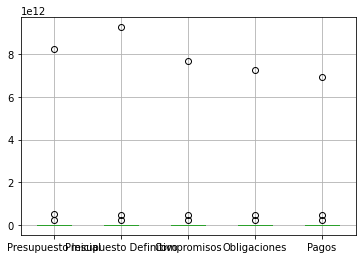

In [41]:
nivel_1[(nivel_1['Nombre DANE Municipio'] == 'MAICAO')].boxplot(column=financial_columns)

Outliers posterior filter application.

<AxesSubplot:>

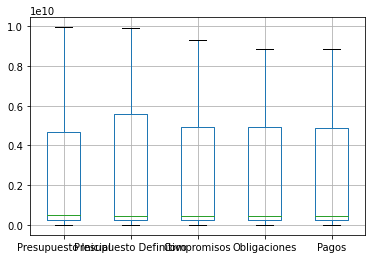

In [42]:
nivel_1_limpio[(nivel_1_limpio['Nombre DANE Municipio'] == 'MAICAO')].boxplot(column=financial_columns)

This process is then repeated for levels 2 and 3 according to the concept code.

In [43]:
nivel_1.to_csv('Gatos_totales_nivel_1.csv')
nivel_2.to_csv('Gatos_totales_nivel_2.csv')
nivel_3.to_csv('Gatos_totales_nivel_3.csv')

nivel_2_limpio = limpiar_outliers(nivel_2)
nivel_2_limpio.to_csv('Gatos_totales_nivel_2_limpio.csv')

nivel_3_limpio = limpiar_outliers(nivel_3)
nivel_3_limpio.to_csv('Gatos_totales_nivel_3_limpio.csv')

## 5. Second filter application.

Although the results of the first filter are very effective in evaluating the outliers within each `Cód. DANE Municipio`, `Código Concepto` and `Código Unidad Ejecutora`. It is necessary to evaluate the outliers within each category to which each municipality belongs, since it is not logical that a category 4 municipality presents higher expenditures than the municipalities of the special categories or of the categories of a higher level.

Para ello y bajo el presunto que las categorias de mayor nivel **ESP**, **1**, **2**, llevan un mejor control de los datos solo se evaluaran los ouliers dentro de las categorias **3**, **4**, **5** y **6**.

To this end, the following function is generated, a series of for cycles in order to evaluate all the rows of the dataset, in this way we have that:

1. The data is filtered by `categoria`, until all the categories are evaluated.
2. Filter the previous result by `Código Unidad Ejecutora`, until all the **unidades ejecutoras** of that categories are evaluated.
3. The previous result is filtered by `Año`, until all the  years of that Unidad Ejecutora are evaluated.

For the identification of the outlier, the maximum given by the interquartile range is calculated.

$$maximum = Q3 + IQR * 1.5$$.

In this case, as with the previous filter, the maximums given by the IQR will be evaluated, with the difference that the value identified as outlier will be divided by 10 until its value is close to but not lower than the median. Without losing individuals values or that the rewrite values are affected by the outliers.

In [44]:
def limpiar_outliers_por_categoria(df):
    df_limpio = pd.DataFrame()
    df_otras = df[(df['categoria'] == 'ESP') | (df['categoria'] == '1') | (df['categoria'] == '2')]
    
    for column in list(df.columns):
        df_limpio[column] = []
    
    categorias = ['3','4','5','6']
    
    for categoria in categorias:
        df_categoria = df[df['categoria'] == categoria].copy()
        cods_ejecutora= list(df_categoria['Código Unidad Ejecutora'].unique())
        
        for cod_ejecutora in cods_ejecutora:
            df_ejecutora = df_categoria[df_categoria['Código Unidad Ejecutora'] == cod_ejecutora].copy()    
            años = list(df_ejecutora['Año'].unique())
            for año in años:
                df_años = df_ejecutora[df_ejecutora['Año'] == año].copy() 

                for finantial_column in financial_columns:
                    data = df_años[finantial_column]
                    q_25, q_75 = data.quantile([0.25,0.75])
                    IQR = q_75 - q_25
                    maximum = q_75 + IQR * 1.5
                    median = data.median()
                    #print(finantial_column+ '---------------------')
                    for val in data:
                        #print('Val '+str(val))
                        if val > maximum:
                            new_val = val
                            while True:
                                #print('median '+str(median))
                                new_val /= 10
                                #print('new_val '+str(new_val))
                                if median >= new_val:
                                    break
                            df_años[finantial_column] = df_años[finantial_column].replace(val, new_val)

                df_limpio = pd.concat([df_limpio, df_años], axis = 0)
    
    df_limpio = pd.concat([df_otras, df_limpio], axis = 0)
    return df_limpio

## 5.1 Verification `limpiar_outliers_por_categoria` function.

The first thing that is verified is that when the filter is applied to the concept level 1 data, the data that appear within the first 60 data from highest to lowest are municipalities of category **ESP** or level **1**, which is what financially better adjusts to the real behavior of these municipalities. There is no evidence that any municipality from other categories is among the first 60 individuals.

In [45]:
nivel_1_limpio_categorias = limpiar_outliers_por_categoria(nivel_1_limpio)

In [56]:
nivel_1_limpio_categorias.sort_values(by = 'Presupuesto Inicial', ascending = False)[0:60]

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,...,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año,Nivel categoria,key,categoria
1591537,210111001.0,BOGOTA D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,2.919074e+12,2.821599e+12,2.467069e+12,2.347192e+12,2.347192e+12,2020.0,1.0,11001_2020,ESP
1411147,210111001.0,BOGOTA D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,2.917373e+12,3.041927e+12,2.822659e+12,2.749884e+12,2.749884e+12,2019.0,1.0,11001_2019,ESP
980032,210111001.0,BOGOTA D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,2.902548e+12,2.835075e+12,2.589441e+12,2.442784e+12,2.442784e+12,2017.0,1.0,11001_2017,ESP
785999,210111001.0,BOGOTA D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,2.805296e+12,2.813175e+12,2.581062e+12,2.477827e+12,2.477827e+12,2016.0,1.0,11001_2016,ESP
1194027,210111001.0,BOGOTA D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,2.408128e+12,2.362667e+12,2.203927e+12,2.146354e+12,2.146354e+12,2018.0,1.0,11001_2018,ESP
1791120,210111001.0,BOGOTA. D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,otros,otros,...,,2.362353e+12,2.109536e+12,1.910392e+12,1.843493e+12,1.843493e+12,2021.0,1.0,11001_2021,ESP
580210,210111001.0,BOGOTA D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,1.880046e+12,1.878602e+12,1.701374e+12,1.653697e+12,1.653697e+12,2015.0,1.0,11001_2015,ESP
412848,210111001.0,BOGOTA D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,1.821922e+12,2.103799e+12,1.925767e+12,1.861874e+12,1.861874e+12,2014.0,1.0,11001_2014,ESP
215835,210111001.0,BOGOTA D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,1.637485e+12,1.631935e+12,1.462142e+12,1.400935e+12,1.400515e+12,2013.0,1.0,11001_2013,ESP
3529,210111001.0,BOGOTA D.C.,11.0,BOGOTA. D.C.,11001.0,BOGOTA. D.C.,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,1.472001e+12,1.460602e+12,1.335949e+12,1.277683e+12,1.277683e+12,2012.0,1.0,11001_2012,ESP


We see that when analyzing the results of the filter we see that the municipalities whose values among the cats by category were similar are not affected, as shown in dataFrames **A** and **B**. Whose pre-filter and post-filter values remained the same.

In [47]:
A = nivel_1_limpio[(nivel_1_limpio['Cód. DANE Municipio'] == 5467) & (nivel_1_limpio['Año'] == 2019)].sort_index()
A

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,...,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año,Nivel categoria,key,categoria
1440274,216705467.0,MONTEBELLO,5.0,ANTIOQUIA,5467.0,MONTEBELLO,1,TOTAL GASTOS DE FUNCIONAMIENTO,6.0,SECRETARIA DE EDUCACION,...,otros,4.841607e+07,4.841607e+07,0.0,0.0,0.0,2019.0,1.0,5467_2019,6
1440275,216705467.0,MONTEBELLO,5.0,ANTIOQUIA,5467.0,MONTEBELLO,1,TOTAL GASTOS DE FUNCIONAMIENTO,5.0,PERSONERIA - SOLO MUNICIPIOS,...,otros,7.580140e+07,7.580140e+07,0.0,0.0,0.0,2019.0,1.0,5467_2019,6
1440279,216705467.0,MONTEBELLO,5.0,ANTIOQUIA,5467.0,MONTEBELLO,1,TOTAL GASTOS DE FUNCIONAMIENTO,2.0,CONCEJO - SOLO MUNICIPIOS,...,otros,1.272309e+08,1.272309e+08,0.0,0.0,0.0,2019.0,1.0,5467_2019,6
1440280,216705467.0,MONTEBELLO,5.0,ANTIOQUIA,5467.0,MONTEBELLO,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,1.593444e+09,1.593444e+09,0.0,0.0,0.0,2019.0,1.0,5467_2019,6


In [48]:
B = nivel_1_limpio_categorias[(nivel_1_limpio_categorias['Cód. DANE Municipio'] == 5467) & (nivel_1_limpio_categorias['Año'] == 2019)].sort_index()
B

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,...,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año,Nivel categoria,key,categoria
1440274,216705467.0,MONTEBELLO,5.0,ANTIOQUIA,5467.0,MONTEBELLO,1,TOTAL GASTOS DE FUNCIONAMIENTO,6.0,SECRETARIA DE EDUCACION,...,otros,4.841607e+07,4.841607e+07,0.0,0.0,0.0,2019.0,1.0,5467_2019,6
1440275,216705467.0,MONTEBELLO,5.0,ANTIOQUIA,5467.0,MONTEBELLO,1,TOTAL GASTOS DE FUNCIONAMIENTO,5.0,PERSONERIA - SOLO MUNICIPIOS,...,otros,7.580140e+07,7.580140e+07,0.0,0.0,0.0,2019.0,1.0,5467_2019,6
1440279,216705467.0,MONTEBELLO,5.0,ANTIOQUIA,5467.0,MONTEBELLO,1,TOTAL GASTOS DE FUNCIONAMIENTO,2.0,CONCEJO - SOLO MUNICIPIOS,...,otros,1.272309e+08,1.272309e+08,0.0,0.0,0.0,2019.0,1.0,5467_2019,6
1440280,216705467.0,MONTEBELLO,5.0,ANTIOQUIA,5467.0,MONTEBELLO,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,1.593444e+09,1.593444e+09,0.0,0.0,0.0,2019.0,1.0,5467_2019,6


On the other hand for the municipalities that presented ouliers we see that the values are rewritten to adjust to the real values, because under no concept it is expected that the municpios of the category **6** (The inferior category) as the minicipality of **TOCA** has equal expenses $211.400.500.000$ pesos, in public services.	

In [53]:
nivel_1_limpio[(nivel_1_limpio['Nombre DANE Municipio'] == 'TOCA') & (nivel_1_limpio['Año'] == 2016)].sort_index()

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,...,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año,Nivel categoria,key,categoria
855617,211415814.0,TOCA,15.0,BOYACA,15814.0,TOCA,1,TOTAL GASTOS DE FUNCIONAMIENTO,8.0,UNIDAD DE SERVICIOS PUBLICOS - SOLO MUNICIPIOS,...,otros,2.114005e+11,2.220757e+11,2.049312e+11,2.049312e+11,2.049312e+11,2016.0,1.0,15814_2016,6
855653,211415814.0,TOCA,15.0,BOYACA,15814.0,TOCA,1,TOTAL GASTOS DE FUNCIONAMIENTO,5.0,PERSONERIA - SOLO MUNICIPIOS,...,otros,1.005186e+09,1.005186e+09,9.568745e+08,9.568745e+08,9.568745e+08,2016.0,1.0,15814_2016,6
855657,211415814.0,TOCA,15.0,BOYACA,15814.0,TOCA,1,TOTAL GASTOS DE FUNCIONAMIENTO,2.0,CONCEJO - SOLO MUNICIPIOS,...,otros,1.398705e+09,1.398705e+09,1.372214e+09,1.372214e+09,1.372214e+09,2016.0,1.0,15814_2016,6
855691,211415814.0,TOCA,15.0,BOYACA,15814.0,TOCA,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,7.206505e+09,7.206505e+09,6.601136e+09,6.601136e+09,6.601136e+09,2016.0,1.0,15814_2016,6


In [57]:
nivel_1_limpio_categorias[(nivel_1_limpio_categorias['Nombre DANE Municipio'] == 'TOCA') & (nivel_1_limpio_categorias['Año'] == 2016)].sort_index()

,Código FUT,Nombre Entidad,Cód. DANE Departamento,Nombre DANE Departamento,Cód. DANE Municipio,Nombre DANE Municipio,Código Concepto,Concepto,Código Unidad Ejecutora,Unidad Ejecutora,...,Fuente Financiación,Presupuesto Inicial,Presupuesto Definitivo,Compromisos,Obligaciones,Pagos,Año,Nivel categoria,key,categoria
855617,211415814.0,TOCA,15.0,BOYACA,15814.0,TOCA,1,TOTAL GASTOS DE FUNCIONAMIENTO,8.0,UNIDAD DE SERVICIOS PUBLICOS - SOLO MUNICIPIOS,...,otros,21140053.3,22207573.3,20493123.8,20493123.8,20493123.8,2016.0,1.0,15814_2016,6
855653,211415814.0,TOCA,15.0,BOYACA,15814.0,TOCA,1,TOTAL GASTOS DE FUNCIONAMIENTO,5.0,PERSONERIA - SOLO MUNICIPIOS,...,otros,100518600.0,100518600.0,95687449.0,95687449.0,95687449.0,2016.0,1.0,15814_2016,6
855657,211415814.0,TOCA,15.0,BOYACA,15814.0,TOCA,1,TOTAL GASTOS DE FUNCIONAMIENTO,2.0,CONCEJO - SOLO MUNICIPIOS,...,otros,13987047.8,13987047.8,13722136.1,13722136.1,13722136.1,2016.0,1.0,15814_2016,6
855691,211415814.0,TOCA,15.0,BOYACA,15814.0,TOCA,1,TOTAL GASTOS DE FUNCIONAMIENTO,1.0,ADMINISTRACION CENTRAL,...,otros,720650519.0,720650519.0,660113618.0,660113618.0,660113618.0,2016.0,1.0,15814_2016,6


## 6. Dataexporting

When checking the results, this change is applied to level 2 and 3 concepts.

In [51]:
nivel_1_limpio_categorias.to_csv('Gatos_totales_nivel_1_limpio_categorias.csv', encoding = 'utf-8', index = False)

nivel_2_limpio_categorias = limpiar_outliers_por_categoria(nivel_2_limpio)
nivel_2_limpio_categorias.to_csv('Gatos_totales_nivel_2_limpio_categorias.csv', encoding = 'utf-8', index = False)

nivel_3_limpio_categorias = limpiar_outliers_por_categoria(nivel_3_limpio)
nivel_3_limpio_categorias.to_csv('Gatos_totales_nivel_3_limpio_categorias.csv', encoding = 'utf-8', index = False)